# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [246]:
import pandas as pd 

df = pd.read_csv("cpr-data.csv")
df.head()
import numpy as np

### Check that your dataframe has 3038 rows and 56 columns.

In [247]:
df.shape

(3038, 56)

### List the columns and their data types

In [248]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [249]:
# PRIMARY_CRIME_CODE: categorize the crimes
# DISPOSITION_TYPE: plea or a trial
# AGREEMENT_TYPE: Indicates whether the agreement is a plea ("plea"), non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")
# COUNTRY
# FINE
# TOTAL_PAYMENT
# USAO: U.S. Attorney's Offices involved in the prosecution. Multiple entries are separated by a "|".
# PROBATION_LENGTH
# AGREEMENT_REQUIRED_NEW_POSITIONS
# INDEP_MONITOR_REQUIRED

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [250]:
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN


## Set pandas to display 65 columns

In [251]:
pd.set_option('display.max_columns', 65)

In [252]:
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN


## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [253]:
pd.set_option('display.max_rows', 100)
df
# display the first and last 50 rows

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,"500,000",0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,001",PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,"2,000",0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,013",PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,"42,000",0,0,0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,012",PACER,NaN
8,2530,"83rd & Union Hills, LLC",plea,Immigration,NaN,

## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [254]:
df.describe()

,REC_ID,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,TOTAL_REGULATORY,AGMT_YEAR
count,"3,038",850,601,"2,908",732,"2,673","1,696","3,038",129,147,258,"3,028"
mean,"1,537","14,238,954","9,847,348","13,536,174","13,356,755",27,"8,260,393","22,842,732","43,401,988","49,055,647","49,165,568","2,008"
std,896,"87,194,942","140,080,529","85,486,442","178,486,417",22,"62,505,203","155,697,740","111,206,755","140,566,295","134,440,266",5
min,1,0,0,0,0,0,0,0,0,0,0,"1,992"
25%,763,0,0,"1,000",0,0,0,"21,892",0,0,0,"2,004"
50%,"1,528",0,0,"70,000",0,24,0,"200,000","2,232,000","2,000,000","1,008,850","2,008"
75%,"2,297",400,"25,000","1,000,000",0,48,"200,000","2,100,000","31,200,000","23,450,000","26,057,430","2,012"
max,"3,147","1,256,000,000","2,744,000,000","2,800,000,000","4,346,800,000",120,"1,256,000,000","4,486,800,000","750,000,000","1,000,000,000","1,000,000,000","2,017"


### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [255]:
pd.set_option('display.float_format', "{:,.0f}".format)
df

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,"500,000",0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,001",PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,"2,000",0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,013",PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,"42,000",0,0,0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,012",PACER,NaN
8,2530,"83rd & Union Hills, LLC",plea,Immigration,NaN,

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [256]:
df.head(2)

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN


# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [257]:
df['DISPOSITION_TYPE'].value_counts()
# How many of cases actually went to trial: 2
# How did most of these cases arrive at a decision: plea, NP, DP

plea               2565
NP                  266
DP                  201
declination           2
dismissal             2
trial convicton       2
Name: DISPOSITION_TYPE, dtype: int64

### Graph the previous answer, with the longest bar on top

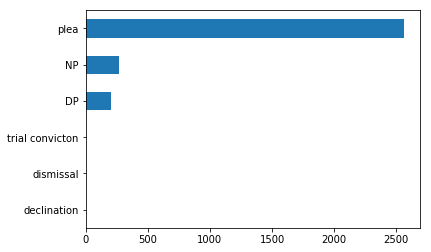

In [258]:
%matplotlib inline
df['DISPOSITION_TYPE'].value_counts().sort_values().plot(kind="barh")

## What's the distribution of total payments look like?

In [259]:
df['TOTAL_PAYMENT'].value_counts().sort_values()

17771613       1
3846000        1
12200000       1
5249916        1
1089000        1
27500000       1
1363000        1
73578          1
29763          1
209995         1
947283         1
19680000       1
593000         1
61000000       1
89198          1
448500000      1
54600000       1
1172000        1
218800000      1
413500         1
21000000       1
360000000      1
10362690       1
157165         1
1654600        1
277400         1
36684          1
9481000        1
1970000        1
22800000       1
1347410        1
28500          1
687960         1
2057408        1
5414000        1
6750000        1
490612         1
375928         1
550000000      1
170000         1
222701         1
99225          1
52000000       1
37000000       1
29988000       1
15278          1
16929719       1
121790         1
582601         1
497773518      1
            ... 
700000         7
350000         8
500            8
15000000       8
175000         8
55000          9
6000000        9
450000        

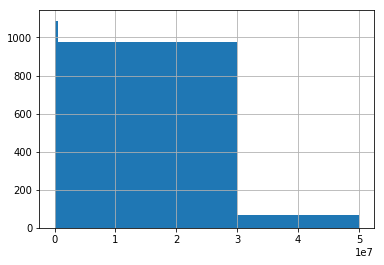

In [260]:
df.TOTAL_PAYMENT.hist(bins=[0, 100, 200, 1000, 2000, 5000, 10000, 20000, 500000, 30000000, 50000000])

## Sort by total payments, descending

In [261]:
df['TOTAL_PAYMENT'].value_counts().sort_values(ascending=True)

17771613       1
3846000        1
12200000       1
5249916        1
1089000        1
27500000       1
1363000        1
73578          1
29763          1
209995         1
947283         1
19680000       1
593000         1
61000000       1
89198          1
448500000      1
54600000       1
1172000        1
218800000      1
413500         1
21000000       1
360000000      1
10362690       1
157165         1
1654600        1
277400         1
36684          1
9481000        1
1970000        1
22800000       1
1347410        1
28500          1
687960         1
2057408        1
5414000        1
6750000        1
490612         1
375928         1
550000000      1
170000         1
222701         1
99225          1
52000000       1
37000000       1
29988000       1
15278          1
16929719       1
121790         1
582601         1
497773518      1
            ... 
700000         7
350000         8
500            8
15000000       8
175000         8
55000          9
6000000        9
450000        

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [262]:
df_short = df[['COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']]
df_short

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25
2,"3rd & Bell, LLC",plea,50,2014-11-21
3,41 Market Inc.,plea,14640,2006-07-05
4,"45,000, Inc.",plea,27500,2005-06-03
5,4628 Group Inc.,plea,500000,2001-07-31
6,"70 North, LLC",plea,2000,2013-03-05
7,806 Trading Corp.,plea,42000,2012-03-05
8,"83rd & Union Hills, LLC",plea,50,2014-11-24
9,"84th & Bell, LLC",plea,50,2014-11-24


## Confirm it has 3038 rows and 5 columns

In [263]:
df_short.shape

(3038, 4)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [264]:
import re
df_short['year'] = df_short['DATE'].str.extract('(\d\d\d\d)').astype(float)
year

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       2003
1       2005
2       2014
3       2006
4       2005
5       2001
6       2013
7       2012
8       2014
9       2014
10      2001
11      2014
12      2003
13       NaN
14      2012
15      2013
16      2011
17      2004
18      2005
19      2009
20      2016
21      2012
22      2005
23      2008
24      2010
25      2010
26      2001
27      2004
28      2004
29      2012
30      2012
31      2013
32      2006
33      2010
34      2007
35      2015
36      2006
37      2000
38      2013
39      2000
40      2010
41      2005
42      2016
43      2011
44      2008
45      2009
46      2013
47      2006
48      2004
49      2004
        ... 
2988    2006
2989    2006
2990    2005
2991    2013
2992    2003
2993    2003
2994    2006
2995    2017
2996    2017
2997    2014
2998    2007
2999    2005
3000    2008
3001    2010
3002    2007
3003    2003
3004    2011
3005    2010
3006    2002
3007    2013
3008    2008
3009    2015
3010    2011
3011    2015
3012    2013
3013    2013

## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [265]:
year.astype(float)

0      2,003
1      2,005
2      2,014
3      2,006
4      2,005
5      2,001
6      2,013
7      2,012
8      2,014
9      2,014
10     2,001
11     2,014
12     2,003
13       nan
14     2,012
15     2,013
16     2,011
17     2,004
18     2,005
19     2,009
20     2,016
21     2,012
22     2,005
23     2,008
24     2,010
25     2,010
26     2,001
27     2,004
28     2,004
29     2,012
30     2,012
31     2,013
32     2,006
33     2,010
34     2,007
35     2,015
36     2,006
37     2,000
38     2,013
39     2,000
40     2,010
41     2,005
42     2,016
43     2,011
44     2,008
45     2,009
46     2,013
47     2,006
48     2,004
49     2,004
        ... 
2988   2,006
2989   2,006
2990   2,005
2991   2,013
2992   2,003
2993   2,003
2994   2,006
2995   2,017
2996   2,017
2997   2,014
2998   2,007
2999   2,005
3000   2,008
3001   2,010
3002   2,007
3003   2,003
3004   2,011
3005   2,010
3006   2,002
3007   2,013
3008   2,008
3009   2,015
3010   2,011
3011   2,015
3012   2,013
3013   2,013

## Make a histogram of cases over the years

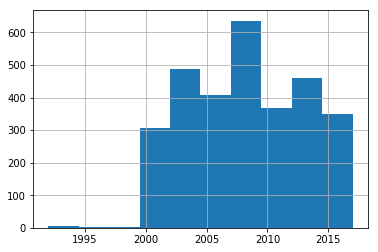

In [266]:
year.astype(float).hist()

## What was the total amount paid across all cases each year?

In [267]:
df_short.groupby('year')['TOTAL_PAYMENT'].sum().sort_values()

year
1,992             0
1,993             0
1,994             0
1,996             0
1,998             0
1,999             0
2,000     278206161
2,001     761777886
2,002     829424749
2,003     911162220
2,006    1201775794
2,004    1637537063
2,008    2729966187
2,011    2957950912
2,007    3034830498
2,016    3808529923
2,009    4090513821
2,005    4210235461
2,010    4745389066
2,012    6696816915
2,017    6866002335
2,014    7062535053
2,013    7724920476
2,015    9844845643
Name: TOTAL_PAYMENT, dtype: int64

## Graph it!

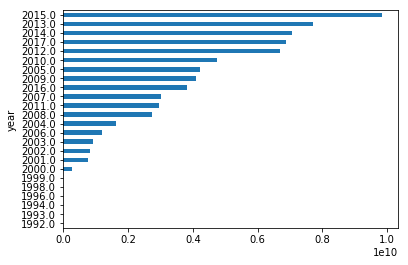

In [268]:
df_short.groupby('year')['TOTAL_PAYMENT'].sum().sort_values().plot('barh')

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [269]:
df.AGREEMENT_REQUIRED_NEW_POSITIONS

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                                                    NaN
17            

In [275]:
df_agreement = df[df['AGREEMENT_REQUIRED_NEW_POSITIONS'].notnull()]

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [339]:
df_agreement.AGREEMENT_REQUIRED_NEW_POSITIONS.value_counts().head()

No                                                                                       163
Yes; Assignment one or more senior officers to compliance, with reporting obligations     46
Yes; Chief Compliance Officer                                                              6
Yes; Compliance Officer                                                                    6
Yes; Compliance officer                                                                    3
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [279]:
df['required_new_position'] = df.AGREEMENT_REQUIRED_NEW_POSITIONS

In [290]:
df.loc[df.required_new_position.str.contains('^Yes', na=False), 'required_new_position'] = 'True'
df.loc[df.required_new_position.str.contains('^No', na=False), 'required_new_position'] = 'False'
df

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,"500,000",0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,001",PACER,NaN,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,"2,000",0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,013",PACER,NaN,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,"42,000",0,0,0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,012",PACER,NaN,NaN


### Confirm that your new column has 163 `True` values and 98 `False` values

In [293]:
df.required_new_position.value_counts()

False    163
True      98
Name: required_new_position, dtype: int64

## Extract the position name into a new column called `new_position`

In [323]:
df['new_position'] = df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.extract("^Yes; (.*)$")
df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN,NaN,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN,NaN,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN,NaN,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN,NaN,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN,NaN,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,"500,000",0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,001",PACER,NaN,NaN,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,"2,000",0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,013",PACER,NaN,NaN,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,"42,000",0,0,0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,n

## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [324]:
df[df.new_position == "Compliance Officer"]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
441,663,Boeing Co.,NP,Fraud - General,No,"California - Central District,Virginia - Easte...",United States,No,NaN,NaN,NaN,2006-06-01,NaN,NaN,NaN,Yes,0,nan,"50,000,000",nan,24,nan,50000000,Yes,Yes; Compliance Officer,No,Yes (RICO - possession of competitor documents...,NaN,Training; discipline; prohibiting retaliation;...,Yes,Yes; Interim Agreement with Air Force: maintai...,"Federal procurement fraud, conflict of interes...",NaN,Yes; in exchange for good faith performance of...,"No; But ""conduct by a Boeing employee classifi...",No,"$50M penalty, $565M civil settlement; $1.9M to...",Yes,Yes; Periodic auditing of compliance program,Interim Admin. Agmt.,No,Yes,Yes,Yes,Yes,Yes; Changes to ethics and compliance program;...,No,"1,900,000","595,000,000",National Aeronautics and Space Administration ...,Yes,"596,900,000",No,"2,006",NaN,Information regarding the Interim Agreement: h...,True,Compliance Officer
664,587,"Columbia Farms, Inc.",DP,Immigration,No,South Carolina,United States,No,NaN,NaN,NaN,2009-11-03,NaN,NaN,NaN,No,"1,500,000",nan,0,nan,24,"1,500,000",1500000,Yes,Yes; Compliance Officer,No,NaN,NaN,Designation of compliance officer; ICE reporti...,Yes,NaN,"Immigration, false statements",NaN,"Yes; acceptance of responsibility, compliance,...",Yes,No,$1.5M,No,"Yes; Use of e-Verify program, annual review of...",NaN,No,No,No,NaN,Yes,Yes; Cites significant remedial actions taken ...,No,nan,nan,Dept. of Homeland Security;Dept. of Homeland S...,Yes,0,No,"2,009",NaN,NaN,True,Compliance Officer
1063,51,Fisher Sand & Gravel / General Steel (subsid.)...,DP,Fraud - Tax,No,USDOJ - Tax Division,United States,No,NaN,NaN,NaN,2009-04-29,NaN,NaN,NaN,No,"668,141",nan,"500,000",nan,30,"668,141",1168141,Yes,Yes; Compliance Officer,No,NaN,NaN,Designate Compliance Officer to oversee implem...,Yes,Yes,Tax fraud,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,"$668,141 restitution for unpaid lax liability;...",No,Yes; Compliance Officer must evaluate periodic...,NaN,No,No,No,NaN,Yes,Yes; Drafted a Code of Business Ethics,No,nan,nan,Dept. of the Treasury - Internal Revenue Servi...,Yes,0,No,"2,009",NaN,NaN,True,Compliance Officer
1657,609,Louis Berger Group,DP,Fraud - General,No,New Jersey,United States,Yes,NaN,NaN,NaN,2010-11-05,NaN,NaN,NaN,No,0,nan,"18,700,000",nan,24,nan,18700000,Yes,Yes; Compliance Officer,No,NaN,NaN,"Complaince, training, hotline, new compliance ...",Yes,No,Major Frauds Statute,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,NaN,Yes,No,NaN,Yes; New obligations of CFO),Yes,No,No,Yes,"Yes; ""extensive reforms and remedial measures""...",No,nan,nan,Dept. of Justice - Civil Division - Fraud Sect...,Yes,0,No,"2,010",NaN,NaN,True,Compliance Officer
1661,610,"Love 

## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

In [337]:
df[df['new_position'].str.contains('Compliance Officer',re.IGNORECASE, na=False)]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
276,655,"Atrium Companies, Inc.",NP,Immigration,No,Texas - Southern District,United States,No,NaN,NaN,NaN,2012-01-01,NaN,NaN,NaN,No,"2,000,000",nan,0,nan,nan,"2,000,000",2000000,NaN,Yes; Chief Compliance Officer,NaN,Yes (writ of attachment for $5 million and inj...,Unknown (couldn't find any information except ...,Hire full time chief compliance officer and co...,Yes,No,Immigration,NaN,.,NaN,NaN,"$2,000,000 to Department of Homeland Security ...",No,NaN,NaN,NaN,No,Yes,NaN,Yes,Yes; Substantial remedial measures; revising i...,NaN,nan,nan,Dept. of Homeland Security - Immigration & Cus...,NaN,0,NaN,"2,012",FOIA request,NaN,True,Chief Compliance Officer
362,754,"Bashas, Inc.",NP,Food,No,Arizona,United States,No,NaN,NaN,NaN,2013-08-30,NaN,NaN,NaN,No,nan,nan,0,nan,24,"1,472,487",1472487,Yes,Yes; Chief Compliance Officer,No,NaN,NaN,Imposing discipline on involved employees; new...,Yes,No,Food-related USDA violations (mislabeling meat),NaN,"Yes; cooperation, acknowledging responsibility...",Yes,No,$1.47 million went to Tuscon Community Food Ba...,No,No,NaN,No,No,NaN,NaN,Yes,Yes; Thorough internal investigation and volun...,No,nan,nan,Dept. of Agriculture,Yes,nan,No,"2,013",NaN,NaN,True,Chief Compliance Officer
415,580,Biomet Inc.,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,United States,No,NaN,NaN,NaN,2012-03-26,NaN,NaN,NaN,Yes,0,nan,"17,800,000",nan,36,nan,17800000,Yes,"Yes; Expanded compliance department, complianc...",No,NaN,NaN,"Compliance department expanded, policy review ...",Yes,Yes; HHS-OIG Corporate Integrity Agreement,Anti-Kickback Statute (payments to doctors),NaN,"Yes; remedial actions, cooperation, acceptance...",Yes,No,None; simultaneous settlement with DOJ Civil D...,Yes,No,NaN,Yes; Detailed rules for Consulting Agreements),No,No,Yes; HHS-OIG ($26.9 million settlement),Yes,Yes; Pre-agreement ethics codes,No,nan,"26,900,000",Dept. of Health & Human Services - Office of t...,No,"26,900,000",No,"2,012",NaN,NaN,True,"Expanded compliance department, compliance off..."
441,663,Boeing Co.,NP,Fraud - General,No,"California - Central District,Virginia - Easte...",United States,No,NaN,NaN,NaN,2006-06-01,NaN,NaN,NaN,Yes,0,nan,"50,000,000",nan,24,nan,50000000,Yes,Yes; Compliance Officer,No,Yes (RICO - possession of competitor documents...,NaN,Training; discipline; prohibiting retaliation;...,Yes,Yes; Interim Agreement with Air Force: maintai...,"Federal procurement fraud, conflict of interes...",NaN,Yes; in exchange for good faith performance of...,"No; But ""conduct by a Boeing employee classifi...",No,"$50M penalty, $565M civil settlement; $1.9M to...",Yes,Yes; Periodic auditing of compliance program,Interim Admin. Agmt.,No,Yes,Yes,Yes,Yes,Yes; Changes to ethics and compliance pr

## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

In [343]:
pd.set_option('display.max_rows', 30)
df[df['new_position'].str.contains('Compliance',re.IGNORECASE, na=False)]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
63,742,"Academi, LLC",DP,Import / Export,No,North Carolina - Eastern District,United States,No,NaN,NaN,NaN,2012-08-07,NaN,NaN,NaN,No,0,nan,"7,500,000",nan,36,nan,7500000,Yes,"Yes; Hired fulltime Director, Export Complianc...",Yes; Third party auditors to conduct annual au...,NaN,NaN,Conduct annual audits to monitor compliance wi...,Yes,Yes; Xe Services LLC (predecessor) entered int...,Export violations (Arms Export Control Act; In...,NaN,NaN,Yes,No,$7.5M fine; $42M civil settlement with Departm...,Yes,Yes; Annual audits,Consent Agmt.,No,Yes,No,Yes; Department of State,Yes,Yes; Acknowledged responsibility; established ...,No; But assertion of privilege will be noted b...,0,"42,000,000",Dept. of State; Dept. of Justice - National Se...,Yes,"42,000,000",No,"2,012",NaN,This is not a parallel civil action but someth...,True,"Hired fulltime Director, Export Compliance, an..."
98,8,Aibel Group Ltd.,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,United Kingdom,No,NaN,NaN,NaN,2007-02-06,NaN,NaN,NaN,No,0,nan,0,nan,36,nan,0,Yes,Yes; Appoinment of executive Chairperson of Bo...,No,NaN,No,Implementation of compliance and ethics progra...,Yes,No,FCPA,NaN,"Yes; voluntary disclosure, reporting, cooperat...",No,No,None,Yes,Yes; Compliance counsel must evaluate effectiv...,NaN,Yes; including prior approval of Department fo...,No,No,NaN,Yes,Yes; Implementation of compliance and ethics p...,Yes,nan,nan,None stated,Yes,0,No,"2,007",NaN,Aibel also had to pay $4.2 million in criminal...,True,Appoinment of executive Chairperson of Board o...
226,572,Appalachian Oil,DP,Fraud - General,No,Virginia - Western District,United States,No,NaN,NaN,NaN,2007-01-31,NaN,NaN,NaN,Yes,"255,000",nan,0,nan,36,"255,000",255000,Yes,Yes; Compliance officer,No,Yes (racketeering/RICO action - R.J. Reynolds ...,2500000,"Retaining compliance officer, training, superv...",Yes,No,Wire fraud,NaN,No,Yes,NaN,"$255,000 civil forfeiture, $2.5 million civil ...",No,No,NaN,No,Yes,Yes,NaN,No,No; None cited,Yes,nan,nan,None,Yes,0,No,"2,007",NaN,NaN,True,Compliance officer
276,655,"Atrium Companies, Inc.",NP,Immigration,No,Texas - Southern District,United States,No,NaN,NaN,NaN,2012-01-01,NaN,NaN,NaN,No,"2,000,000",nan,0,nan,nan,"2,000,000",2000000,NaN,Yes; Chief Compliance Officer,NaN,Yes (writ of attachment for $5 million and inj...,Unknown (couldn't find any information except ...,Hire full time chief compliance officer and co...,Yes,No,Immigration,NaN,.,NaN,NaN,"$2,000,000 to Department of Homeland Security ...",No,NaN,NaN,NaN,No,Yes,NaN,Yes,Yes; Substantial remedial measures; revising i...,NaN,nan,nan,Dept. of Homeland Security - Immigration & Cus...,NaN,0,NaN,"2,012",FOIA request,NaN,True,Chief Compliance Officer
278,656,Aurora Foods,N

## What were the most popular crimes that required a compliance officer's appointment?

In [344]:
df_compliance = df[df['new_position'].str.contains('Compliance',re.IGNORECASE, na=False)]

In [347]:
df_compliance['PRIMARY_CRIME_CODE'].value_counts().head(1)

Kickbacks    6
Name: PRIMARY_CRIME_CODE, dtype: int64

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

In [349]:
df['required_outside_auditors'] = df.AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS
df.loc[df.required_outside_auditors.str.contains('^Yes', na=False), 'required_outside_auditors'] = 'True'
df.loc[df.required_outside_auditors.str.contains('^No', na=False), 'required_outside_auditors'] = 'False'
df['year'] = df['DATE'].str.extract('(\d\d\d\d)').astype(float)
df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position,required_outside_auditors,year
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,"272,734",12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003",PACER,NaN,NaN,NaN,NaN,"2,003"
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000",nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN,NaN,NaN,NaN,"2,005"
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014",PACER,NaN,NaN,NaN,NaN,"2,014"
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640",nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006",PACER,NaN,NaN,NaN,NaN,"2,006"
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000",nan,0,"2,500",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005",PACER,NaN,NaN,NaN,NaN,"2,005"
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,"500,000",0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,001",PACER,NaN,NaN,NaN,NaN,"2,001"
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,"2,000",0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,013",PACER,NaN,NaN,NaN,NaN,"2,013"
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,"42,000

In [355]:
year.dtypes

dtype('O')

In [384]:
df[(df.year.astype(float) <= 2002) & (df['required_outside_auditors'] == 'True')]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position,required_outside_auditors,year


In [385]:
df[(df.year.astype(float) > 2002) & (df['required_outside_auditors'] == 'True')]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position,required_outside_auditors,year
34,565,ABT Associates,DP,Other,No,Massachusetts,United States,No,NaN,NaN,NaN,2007-01-18,NaN,NaN,NaN,No,"194,578",nan,"2,121,688",nan,27,"194,578",2316266,Yes,No,Yes; Third party auditor/CPA firm,NaN,No,Foreign Currency Transition Policy; internal a...,Yes,No,False Claims,NaN,Yes; outside auditor.,Yes,No,$2.9 million in fines and restitution,No,Yes; Internal auditing program,NaN,Yes; New procedures for supervision and audito...,Yes,No,NaN,Yes,"Yes; Abt ""has established"" a Foreign Currency ...",No,nan,nan,U.S. Agency for International Development (USAID),Yes,0,No,"2,007",NaN,Second time that ABT Assoc. came to an agreeme...,False,NaN,True,"2,007"
47,648,AIG,NP,Fraud - Securities,No,USDOJ - Criminal Division - Fraud Section,United States,Yes,NaN,NaN,NaN,2006-02-07,NaN,NaN,NaN,Yes,0,"25,000,000",0,nan,36,nan,25000000,Yes,No,Yes; Consultant hired with SEC and NY AG and S...,NaN,NaN,Remediation plan re: controls over financial r...,Yes,Yes,Securities Fraud,NaN,"Yes; cooperation, acceptance of responsibility...",Yes,No,$25M paid to USPIS Consumer Fraud Fund; $100K ...,No,No,SEC Consent Decree,No,Yes,No,Yes; SEC,Yes,"Yes; Certain corporate governance reforms, inc...",Yes,"700,000,000","100,000,000",Securities and Exchange Commission (SEC); U.S....,Yes,"800,000,000",No,"2,006",NaN,NaN,False,NaN,True,"2,006"
63,742,"Academi, LLC",DP,Import / Export,No,North Carolina - Eastern District,United States,No,NaN,NaN,NaN,2012-08-07,NaN,NaN,NaN,No,0,nan,"7,500,000",nan,36,nan,7500000,Yes,"Yes; Hired fulltime Director, Export Complianc...",Yes; Third party auditors to conduct annual au...,NaN,NaN,Conduct annual audits to monitor compliance wi...,Yes,Yes; Xe Services LLC (predecessor) entered int...,Export violations (Arms Export Control Act; In...,NaN,NaN,Yes,No,$7.5M fine; $42M civil settlement with Departm...,Yes,Yes; Annual audits,Consent Agmt.,No,Yes,No,Yes; Department of State,Yes,Yes; Acknowledged responsibility; established ...,No; But assertion of privilege will be noted b...,0,"42,000,000",Dept. of State; Dept. of Justice - National Se...,Yes,"42,000,000",No,"2,012",NaN,This is not a parallel civil action but someth...,True,"Hired fulltime Director, Export Compliance, an...",True,"2,012"
74,755,"Adams Thermal Systems, Inc.",DP,OSHA / Workplace Safety / Mine Safety,No,South Dakota,United States,No,NaN,NaN,NaN,2013-09-05,NaN,NaN,NaN,No,"435,000",nan,"450,000",nan,36,"450,000",900000,Yes,Yes; More safety and health department employe...,Yes; Review Department of Labor compliance terms,NaN,NaN,"Third party to audit terms of agreement, which...",Yes,Yes; DOL (OSHA),OSHA,NaN,"Yes; acceptance of responsibility, entry into ...",Yes,No,Agreement with USAO sets out $1.35 mil

In [407]:
# The comparision of the requests of outside auditors before and after 2003 demonstrates that this kind of request started from 2003. 

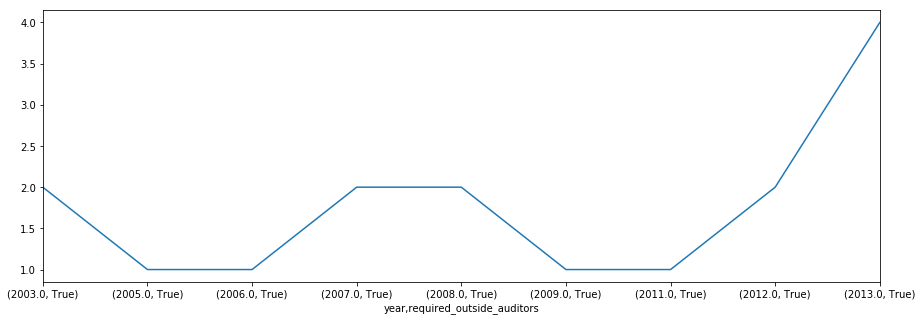

In [428]:
df[df['required_outside_auditors'] == 'True'].groupby('year')['required_outside_auditors'].value_counts().plot(x='year', figsize=(15,5))